# 以平均氣壓、溫度、濕度、風速預測是否下雨

In [441]:
import pandas as pd
import glob
import numpy as np

## 匯入資料並合併成一個資料表
### (從2015年7月到2018年6月)

In [442]:
filenames = glob.glob('觀測資料/*.csv')
dfs = []
for filename in filenames:
    try:
        dfs.append(pd.read_csv(filename))
    except:
        pass
df = pd.concat(dfs, ignore_index=True)
df.head()

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時)
0,1.0,嘉義,2017/10/07,23:10:00,"1,008.3",28.2,80,靜風,0,0,-
1,2.0,嘉義,2017/10/07,22:10:00,"1,008.5",28.7,82,西南西,0.5,0,-
2,3.0,嘉義,2017/10/07,21:10:00,"1,008.2",28.2,83,靜風,0.2,0,-
3,4.0,嘉義,2017/10/07,20:10:00,"1,008",29.3,78,西北西,1.7,0,-
4,5.0,嘉義,2017/10/07,19:10:00,"1,007",30,75,靜風,0.1,0,0


## 將空值( - )轉為( )

In [443]:
df.replace('-', '', inplace=True)
df.head()

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時)
0,1.0,嘉義,2017/10/07,23:10:00,"1,008.3",28.2,80,靜風,0,0,
1,2.0,嘉義,2017/10/07,22:10:00,"1,008.5",28.7,82,西南西,0.5,0,
2,3.0,嘉義,2017/10/07,21:10:00,"1,008.2",28.2,83,靜風,0.2,0,
3,4.0,嘉義,2017/10/07,20:10:00,"1,008",29.3,78,西北西,1.7,0,
4,5.0,嘉義,2017/10/07,19:10:00,"1,007",30,75,靜風,0.1,0,0


## 將資料欄位進行處理

In [444]:
# 刪除多的列
df.dropna(how='all', inplace=True)
# 將空值補零
df = df.replace('', np.nan).fillna(0)
# 將數值中的逗號去除
df['測站氣壓(hPa)'] = df['測站氣壓(hPa)'].str.replace(',', '')

## 調整欄位型態

In [445]:
df[['測站氣壓(hPa)','溫度(℃)','相對溼度(%)', '風速(m/s)']] = df[['測站氣壓(hPa)','溫度(℃)','相對溼度(%)', '風速(m/s)']].astype('float')
df.head()

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時)
0,1.0,嘉義,2017/10/07,23:10:00,1008.3,28.2,80.0,靜風,0.0,0,0
1,2.0,嘉義,2017/10/07,22:10:00,1008.5,28.7,82.0,西南西,0.5,0,0
2,3.0,嘉義,2017/10/07,21:10:00,1008.2,28.2,83.0,靜風,0.2,0,0
3,4.0,嘉義,2017/10/07,20:10:00,1008.0,29.3,78.0,西北西,1.7,0,0
4,5.0,嘉義,2017/10/07,19:10:00,1007.0,30.0,75.0,靜風,0.1,0,0


## 產生是否下雨的欄位

In [446]:
# 將Label轉為(0,1)
df['是否降雨'] = df['降水量(mm)'].apply(lambda x: 1 if x!=0 else 0)
df.head(200)

,序號,測站,監測日期,監測時間,測站氣壓(hPa),溫度(℃),相對溼度(%),風向,風速(m/s),降水量(mm),日照時數(小時),是否降雨
0,1.0,嘉義,2017/10/07,23:10:00,1008.3,28.2,80.0,靜風,0.0,0,0,0
1,2.0,嘉義,2017/10/07,22:10:00,1008.5,28.7,82.0,西南西,0.5,0,0,0
2,3.0,嘉義,2017/10/07,21:10:00,1008.2,28.2,83.0,靜風,0.2,0,0,0
3,4.0,嘉義,2017/10/07,20:10:00,1008.0,29.3,78.0,西北西,1.7,0,0,0
4,5.0,嘉義,2017/10/07,19:10:00,1007.0,30.0,75.0,靜風,0.1,0,0,0
5,6.0,嘉義,2017/10/07,18:10:00,1006.6,30.6,73.0,西,1.1,0,0,0
6,7.0,嘉義,2017/10/07,17:10:00,1005.8,32.0,68.0,西北西,0.8,0,0.3,0
7,8.0,嘉義,2017/10/07,16:10:00,1006.2,33.4,63.0,西,2.5,0,1,0
8,9.0,嘉義,2017/10/07,15:10:00,1006.2,34.0,62.0,西南西,4.3,0,1,0
9,10.0,嘉義,2017/10/07,14:10:00,1006.0,34.7,60.0,西南,3.5,0,0.9,0


## 取用需要的欄位

In [448]:
df1 = df[['測站氣壓(hPa)','溫度(℃)','相對溼度(%)', '風速(m/s)', '是否降雨']]
df1.dropna(inplace=True)
df1.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,測站氣壓(hPa),溫度(℃),相對溼度(%),風速(m/s),是否降雨
0,1008.3,28.2,80.0,0.0,0
1,1008.5,28.7,82.0,0.5,0
2,1008.2,28.2,83.0,0.2,0
3,1008.0,29.3,78.0,1.7,0
4,1007.0,30.0,75.0,0.1,0


# Decission Tree

In [457]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [458]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 建立分類器
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf.fit(x_train, y_train)

# 預測
y_test_predicted = clf.predict(x_test)

clf.score(x_test,y_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    111213
           1       0.58      0.08      0.15     28611

    accuracy                           0.80    139824
   macro avg       0.69      0.53      0.52    139824
weighted avg       0.76      0.80      0.74    139824



In [476]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

data_feature_name = list(df1)[:-1]
data_target_name = ['0','1']

dot_tree = export_graphviz(clf,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())

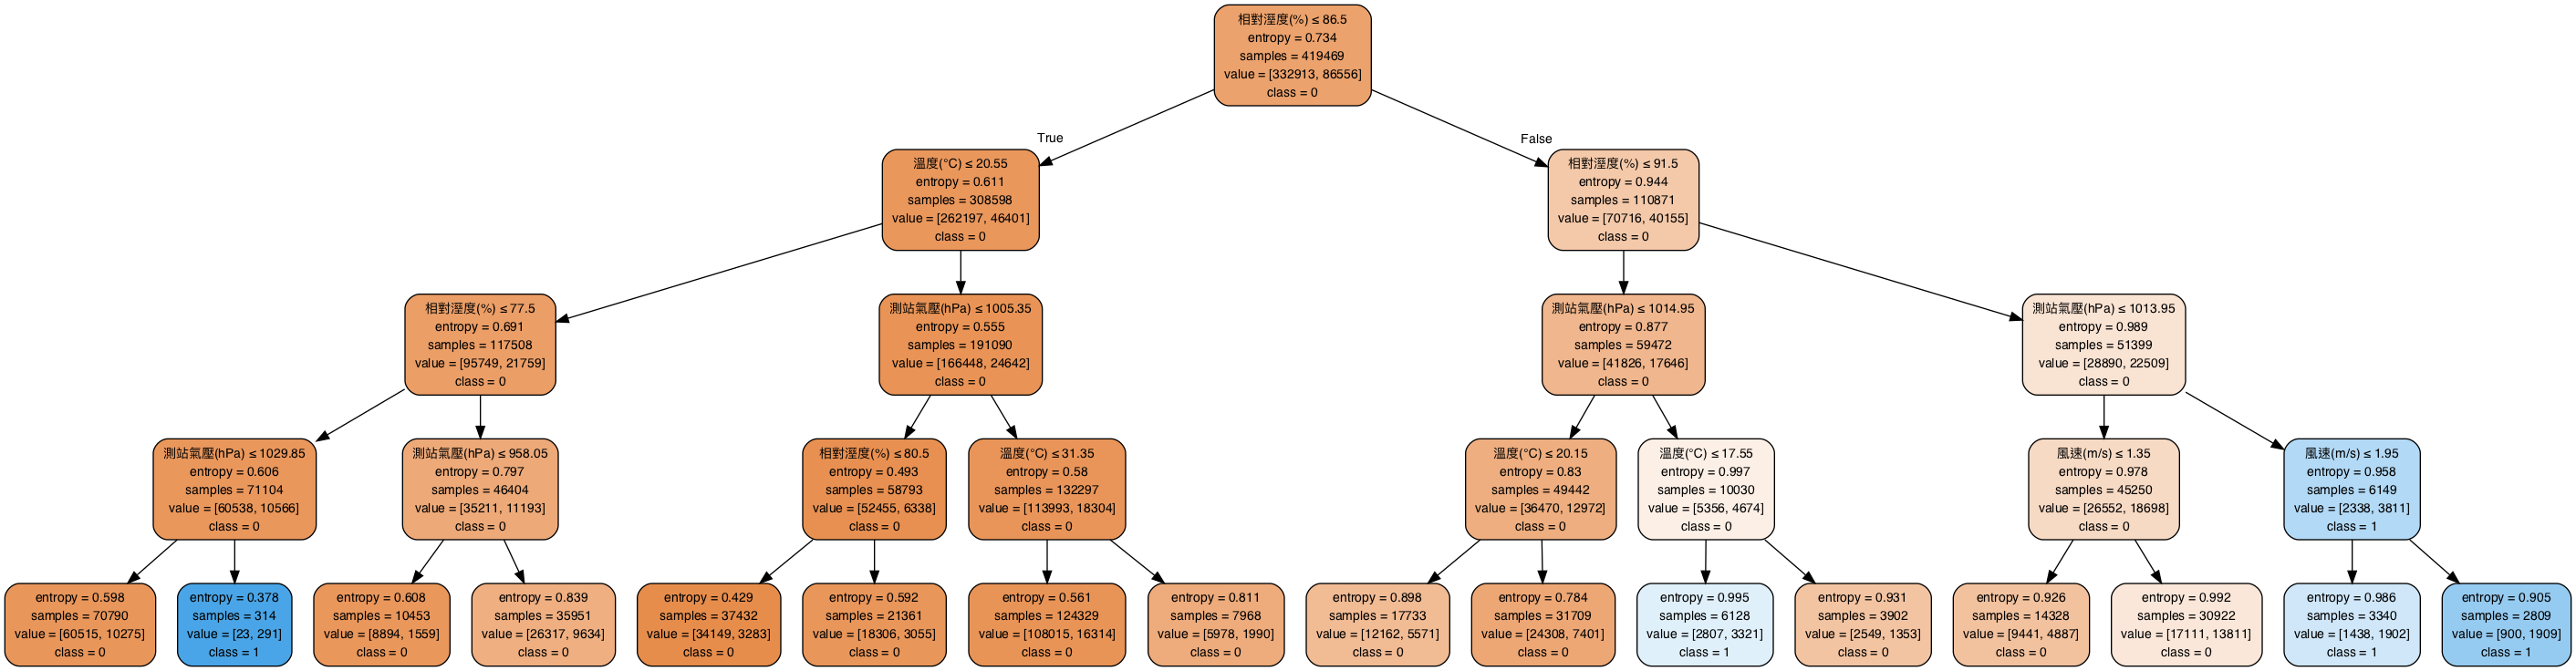

In [477]:
img